# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

In [2]:
# 64 features
X.shape

(537, 64)

載入 相關套件 並 執行 PCA 實驗 ...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
np.random.seed(100)
%matplotlib inline

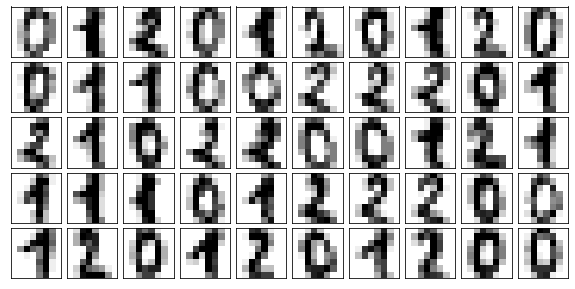

In [4]:
# axes.flat: 將ndarray資料平坦化並輸出

def plot_digits(data):
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},   # 將量度拿掉, 圖形比較簡單
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [5]:
# 設定模型與參數
pca = decomposition.PCA(n_components=3)     # 降到3維

In [6]:
# 建模並視覺化結果
X = pca.fit_transform(X)
# 下面等同上面這一行
# pca.fit(X)
# X = pca.tranfrom(X)

In [7]:
# 已經降維了, 映射到3維空間
X.shape

(537, 3)

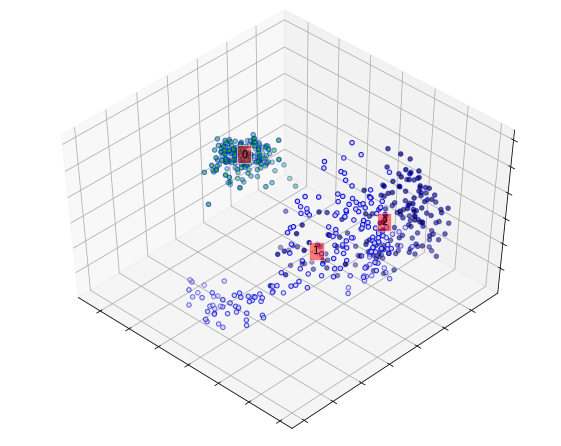

In [8]:
# 建模並視覺化結果


fig = plt.figure(1, figsize=(8, 6))
plt.clf()  # Clear the current figure.
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()  # Clear the current axes.


for name, label in [('0', 0), ('1', 1), ('2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='r'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)       # 將y裡面的全部改成0, 1, or 2
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [9]:
y

array([1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 1., 2., 2., 1., 1., 0., 0.,
       0., 1., 2., 0., 2., 1., 0., 0., 1., 1., 2., 0., 2., 2., 2., 2., 1.,
       2., 0., 0., 0., 1., 1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 1., 2.,
       2., 1., 1., 0., 0., 0., 1., 2., 0., 2., 1., 0., 0., 1., 1., 2., 0.,
       2., 2., 2., 2., 1., 2., 0., 0., 0., 1., 1., 2., 0., 1., 2., 0., 1.,
       2., 0., 1., 1., 2., 2., 1., 1., 0., 0., 0., 1., 2., 0., 2., 1., 0.,
       0., 1., 1., 2., 0., 2., 2., 2., 2., 1., 2., 0., 0., 0., 1., 1., 2.,
       0., 1., 2., 0., 1., 2., 0., 1., 1., 2., 2., 1., 1., 0., 0., 0., 1.,
       2., 0., 2., 1., 0., 0., 1., 1., 2., 0., 2., 2., 2., 2., 1., 2., 0.,
       0., 0., 1., 1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 1., 2., 2., 1.,
       1., 0., 0., 0., 1., 2., 0., 2., 1., 0., 0., 1., 1., 2., 0., 2., 2.,
       2., 2., 1., 2., 0., 0., 0., 1., 1., 2., 0., 1., 2., 0., 1., 2., 0.,
       1., 1., 2., 2., 1., 1., 0., 0., 0., 1., 2., 0., 2., 1., 0., 0., 1.,
       1., 2., 0., 2., 2.